<a href="https://colab.research.google.com/github/shyampagadi/FASTAI-V3/blob/master/Santander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.tabular import *
import zipfile
import csv

In [2]:
path = Config.data_path()/'santander'
path.mkdir(parents=True, exist_ok=True)
path

PosixPath('/root/.fastai/data/santander')

In [3]:
!pip install kaggle
import os
os.environ["KAGGLE_USERNAME"] = 'pagadi'
os.environ["KAGGLE_KEY"] = 'dc52e9e9a875b9be617123235cc9f352'

In [5]:
!kaggle competitions download -c santander-customer-transaction-prediction


 99% 121M/122M [00:02<00:00, 70.7MB/s]
100% 122M/122M [00:02<00:00, 49.9MB/s]
  0% 0.00/463k [00:00<?, ?B/s]
100% 463k/463k [00:00<00:00, 29.3MB/s]
 86% 105M/122M [00:01<00:00, 42.8MB/s] 
100% 122M/122M [00:02<00:00, 63.3MB/s]


In [6]:
ls

sample_data/  sample_submission.csv.zip  test.csv.zip  train.csv.zip


In [0]:
!mkdir -p data1/santander

!cp train.csv.zip data1/santander
!cp test.csv.zip data1/santander
!cp sample_submission.csv.zip data1/santander
path = Path('data1/santander')

In [44]:
# zip_ref = zipfile.ZipFile('/content/data1/santander/train.csv.zip', 'r')
# zip_ref.extractall(path)
# zip_ref = zipfile.ZipFile('/content/data1/santander/test.csv.zip', 'r')
# zip_ref.extractall(path)
# zip_ref = zipfile.ZipFile('/content/data1/santander/sample_submission.csv.zip', 'r')
# zip_ref.extractall('data1/santander')
# zip_ref.close()
path.ls()

[PosixPath('data1/santander/train.csv.zip'),
 PosixPath('data1/santander/sample_submission.csv.zip'),
 PosixPath('data1/santander/train.csv'),
 PosixPath('data1/santander/sample_submission.csv'),
 PosixPath('data1/santander/test.csv'),
 PosixPath('data1/santander/test.csv.zip')]

In [8]:
!unzip data1/santander/test.csv.zip -d data1/santander/
!unzip data1/santander/train.csv.zip -d data1/santander/
!unzip data1/santander/sample_submission.csv.zip -d data1/santander/


Archive:  data1/santander/test.csv.zip
  inflating: data1/santander/test.csv  
Archive:  data1/santander/train.csv.zip
  inflating: data1/santander/train.csv  
Archive:  data1/santander/sample_submission.csv.zip
  inflating: data1/santander/sample_submission.csv  


NameError: ignored

In [82]:
ls

data1/  sample_data/               test.csv.zip
path/   sample_submission.csv.zip  train.csv.zip


In [0]:
df = pd.read_csv(path/'train.csv')
test_df = pd.read_csv(path/'test.csv')
# df.head()

In [0]:
dep_var = 'target'
cont_names = [] #creating empty list, to be filled with loop below
var_counter = 0 #creating a counter
num_of_cont_vars = len(df.columns) - 2
for _ in range(num_of_cont_vars):
    name = 'var_' + str(var_counter)
    cont_names.append(name)
    var_counter+=1
procs = [FillMissing, Normalize]

In [0]:
test = TabularList.from_df(test_df, path=path, cont_names=cont_names, procs=procs)


In [0]:
data = (TabularList.from_df(df, path=path, cont_names=cont_names, procs=procs)
        .random_split_by_pct(valid_pct=0.2)
        .label_from_df(cols=dep_var)
        .add_test(test)
        .databunch())

In [52]:
data.show_batch(rows=10)


var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,target
-0.1481,0.7559,0.4506,-1.0375,-0.3528,-1.0957,-1.0443,-1.3870,0.6901,-0.0810,0.4903,1.8817,0.9188,-1.4099,0.5061,0.3203,2.0474,0.5865,0.8342,1.2785,1.6516,-0.0185,-1.8142,-1.4638,-0.5014,1.3204,-0.6531,0.5617,-1.5091,1.8245,0.4054,-0.4161,-0.9474,0.8813,-0.2556,0.5240,0.7836,1.1813,0.0722,-1.3871,0.5509,1.8442,0.9457,-1.2133,0.0853,-1.3960,-1.4926,-1.3402,0.8083,0.8221,-0.4975,0.4814,-1.0624,1.1535,-0.2127,-1.2382,-1.8015,-0.2901,-1.1813,0.6452,1.3199,-2.1141,-1.1829,-0.5942,1.2136,-0.6470,-0.4705,-0.1368,0.2092,1.1998,-1.0065,-0.0335,-0.5927,0.0149,0.6331,0.8875,-2.0322,0.4750,-1.2144,-0.1593,-0.2300,0.4507,-1.6740,1.2327,-0.3219,-0.3880,0.4086,-2.1382,1.1237,0.7822,1.5774,2.7320,-1.1106,-0.3942,-2.0210,0.1988,1.1549,0.1781,0.6056,-0.1644,0.3370,-1.0838,-0.6435,-1.2769,0.1827,1.8120,-0.3811,-2.0477,0.5986,1.1579,-0.1862,0.3140,-1.8115,-1.3167,-0.0776,-0.1080,1.2826,-0.7870,-0.2260,0.0175,-0.0364,-0.7980,0.7547,0.3023,0.7917,1.4276,-0.8398,-1.4660,0.3243,-0.4003,0.1126,-1.5686,0.4702,-0.9001,-0.9192,-1.2421,0.9507,1.3816,0.3175,-1.0500,-0.5484,-1.0141,0.4575,0.1532,-0.1898,1.3421,-1.7465,0.7135,0.4773,0.4053,0.2180,-1.2960,-0.6564,-0.7354,-1.1247,-0.6707,-0.3716,0.7086,0.2810,-1.2086,0.9982,0.1466,0.9061,0.9788,-1.5558,-0.1338,-0.8703,0.5651,0.3708,0.4529,-0.2674,0.9741,-1.8107,2.0643,1.5238,-1.6932,-1.8558,-1.6902,-0.2254,0.7093,-1.3246,-0.6968,-0.4403,0.8232,-0.0158,-0.0463,0.3704,1.1038,-0.0055,-0.5891,0.8287,-0.5890,0.2834,0.2603,1.0459,1.0415,0.9829,0.4171,1.2236,-1.1995,0
-0.8751,-0.0328,2.4103,1.0120,1.6069,-1.2479,0.5708,-0.6804,0.7697,0.9738,-2.0423,0.8498,-0.4136,1.4883,0.2920,-1.7486,-1.2215,-0.5849,-0.5595,-0.9959,0.0322,1.5048,-0.1094,-0.1230,-1.3972,-0.8165,-0.0180,-0.9031,0.0845,0.7621,-1.1026,-1.6136,0.6776,-2.0598,0.0820,-1.2508,0.5582,-1.2674,-0.0070,-0.5944,-0.6308,0.8880,-0.8191,0.4258,0.7945,0.9890,0.5808,-0.9990,-0.2946,0.0676,-0.0012,0.0867,-0.6265,0.4122,-1.0551,-0.1774,-0.1101,0.7562,-0.3754,1.0346,1.0603,-0.4602,-0.2756,0.5390,0.3676,-0.1642,-1.3129,-1.0775,1.6140,0.3756,-0.0685,-0.8318,-0.7595,0.3841,1.7041,1.5216,1.1429,-0.8883,0.2278,-1.9189,-1.1444,-0.0779,-0.5907,0.6642,-1.1660,-0.2882,-0.9203,-0.1833,-0.1995,0.8949,0.1214,0.5829,0.5923,-0.6727,-0.1541,-1.3108,0.9038,0.8061,-0.5032,1.1069,2.1743,-0.7196,0.8926,0.5496,-1.4236,-0.0379,1.2301,1.3761,-2.3324,-0.5987,0.6187,0.1077,-0.5915,-0.2178,0.0723,0.6674,-1.6182,-1.1388,-0.0147,0.8375,-1.1665,-1.8100,1.3466,-0.1555,-1.3214,0.1913,0.1216,0.0444,2.1598,-0.6603,-0.2980,0.8397,0.70

In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-02


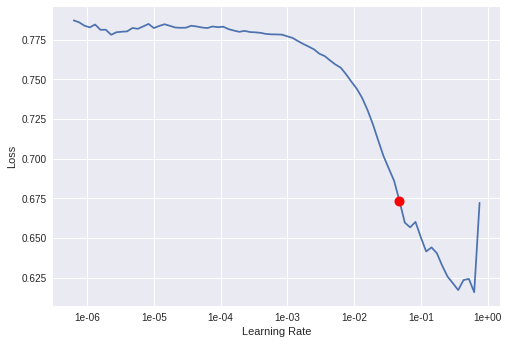

In [54]:
learn.lr_find()
learn.recorder.plot()

In [59]:
learn.fit_one_cycle(30, 5e-3)


epoch,train_loss,valid_loss,accuracy
1,0.242790,0.239730,0.911300
2,0.228839,0.241889,0.910525
3,0.226843,0.244272,0.907400
4,0.236949,0.236672,0.912200
5,0.225718,0.236593,0.912225
6,0.216784,0.239335,0.910575
7,0.245115,0.238581,0.912625
8,0.221515,0.244769,0.910925
9,0.227669,0.244914,0.911250
10,0.218337,0.240658,0.912350


In [0]:
data = (TabularList.from_df(df, path=path, cont_names=cont_names, procs=procs)
        .random_split_by_pct(valid_pct=0.01)
        .label_from_df(cols=dep_var)
        .add_test(test)
        .databunch())

In [0]:
learn = tabular_learner(data, layers=[300,150,50], metrics=accuracy,ps=0.5)
# ?tabular_learner()

In [86]:
learn.fit_one_cycle(10, 5e-3)


epoch,train_loss,valid_loss,accuracy
1,0.249664,0.215553,0.920500
2,0.241010,0.215260,0.921000
3,0.250836,0.211257,0.922000
4,0.246234,0.220173,0.920500
5,0.243512,0.212750,0.922500
6,0.250086,0.218240,0.921000
7,0.225810,0.211518,0.920000
8,0.239246,0.205186,0.927000
9,0.228686,0.207611,0.923500
10,0.224095,0.204311,0.927000


In [0]:
learn.save('initial-run')


In [88]:
sample = pd.read_csv(path/'sample_submission.csv')
sample.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [0]:
preds = learn.get_preds(ds_type=DatasetType.Test)


In [0]:
target_preds = preds[0][:,1]
test_df['target'] = target_preds
test_df.to_csv(path/'submission.csv', columns=['ID_code', 'target'], index=False)

In [1]:
sub = pd.read_csv(path/'submission.csv')


NameError: ignored

In [93]:
 ! kaggle competitions submit -c santander-customer-transaction-prediction -f {path/'submission.csv'} -m "My submission"

100% 2.95M/2.95M [00:01<00:00, 2.44MB/s]
Successfully submitted to Santander Customer Transaction Prediction